In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from file_readers.PropertyFileReader import PropertyFileReader
from file_readers.OffenseFileReader import OffenseFileReader
from file_readers.IncidentFileReader import IncidentFileReader

property_file_reader = PropertyFileReader()
offense_file_reader = OffenseFileReader()
incident_file_reader = IncidentFileReader()

In [2]:
incident = incident_file_reader.get_incident_df()
incident.head()

,data_year,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,orig_format,did
0,2023,937,165629217,44294843,f,2023-02-02 15:45:57.626,2023-01-01,f,0.0,6,NaN,WARNINGS,NaN,X,172557926
1,2023,937,168896599,44294843,f,2023-03-30 02:45:11.651,2023-01-01,f,3.0,6,NaN,ACCEPTED,NaN,X,181397410
2,2023,937,166286996,44294843,f,2023-02-13 03:39:31.498,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464262
3,2023,937,166286997,44294843,f,2023-02-13 03:39:32.566,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464265
4,2023,937,166286998,44294843,f,2023-02-13 03:39:33.49,2023-01-01,f,5.0,6,NaN,ACCEPTED,NaN,X,174464268


In [3]:
property = property_file_reader.get_property_df()
property.head()

,incident_id,property_id,property_value,prop_desc_name,prop_loss_name
73757,165630349,162718431,2.0,Drug Equipment,Seized
73764,166287040,163287413,2.0,Drug Equipment,Seized
73776,167756518,164568031,5.0,Drug Equipment,Seized
73789,167374455,164242875,2.0,Drug Equipment,Seized
73799,167374530,164242944,2.0,Drug Equipment,Seized


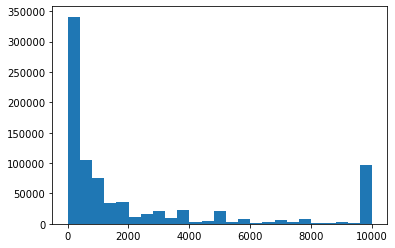

In [4]:
# HISTOGRAM OF PROPERTY VALUES
MAX_PROPERTY_VALUE_FOR_HISTOGRAM = 10000
property_values = property["property_value"].values
property_values = [min(MAX_PROPERTY_VALUE_FOR_HISTOGRAM, value) for value in property_values]

plt.hist(property_values, bins=25);

In [5]:
# LIST OF MEAN PROPERTY VALUES FOR EACH CATEGORY OF PROPERTY
property_grouped = property.groupby("prop_desc_name")
property_grouped_sort_by_mean = property_grouped["property_value"].mean().sort_values(ascending=False)
for key, value in property_grouped_sort_by_mean.items():
    print(key, int(value))

Aircraft 89726
Building Materials 19787
Watercraft 19523
Buses 19222
Collections/ Collectibles 17662
Negotiable Instruments 15324
Trucks 15286
Jewelry/ Precious Metals 14860
Recreational Vehicles 13856
Trailers 13482
Industrial Equipment 13384
Automobile 12519
Structure/ Single dwelling 12294
Farm Equipment 12193
Money 11960
Other Motor Vehicles 10121
Drugs/ Narcotics 8459
Metals, Non-Precious 8300
Aircraft Parts/ Accessories 6439
Structure/ Public 6434
Crops 6408
Livestock 5710
Structure/ Other 4448
Watercraft Equipment/ Parts/ Accessories 4443
Structure/ Other commercial 4335
Structure/ Other residence 4005
Structure/ Other industrial 3971
Medical/ Medical Lab Equipment 3512
Photographic/ Optical Equipment 3294
Pets 3246
Structure/ Storage 3180
Other 2995
Tools 2935
Musical Instruments 2824
Clothes/ Furs 2422
Computer Hard/ Software 2355
Recordings 2182
Chemicals 2120
Lawn/ Yard/ Garden Equipment 2046
Logging Equipment 1827
Vehicle Parts 1731
Law Enforcement Equipment 1563
Bicycles 1

In [ ]:
# 25 MOST COSTLY INCIDENTS, WITH OFFENSE DESCRIPTIONS
property = property_file_reader.get_property_df()
property = offense_file_reader.merge_offense_to_df(property)
property = property.sort_values(by="property_value", ascending=False)
property.head(n=25)

,incident_id,property_id,property_value,prop_desc_name,prop_loss_name,offense_name
830861,187008341,181193892,124465227.0,Building Materials,Stolen/Etc,All Other Larceny
784100,175335063,171126366,73455869.0,Clothes/ Furs,Stolen/Etc,Burglary/Breaking & Entering
216601,176448290,172105935,66000000.0,Other,Stolen/Etc,Embezzlement
864961,180899008,175894945,54158500.0,Money,Counterfeited/Forged,Counterfeiting/Forgery
253058,177001032,172579147,23647110.0,Collections/ Collectibles,Stolen/Etc,Destruction/Damage/Vandalism of Property
253057,177001032,172579147,23647110.0,Collections/ Collectibles,Stolen/Etc,Burglary/Breaking & Entering
977699,181986121,176837587,10010000.0,Structure/ Other,Burned,Arson
865001,187212229,181372080,9999999.0,Money,Counterfeited/Forged,Counterfeiting/Forgery
843517,175613126,171374409,8800000.0,Structure/ Single dwelling,Stolen/Etc,False Pretenses/Swindle/Confidence Game
685158,184723856,179214879,8500000.0,Money,Stolen/Etc,All Other Larceny
